# 1. Importing libraries
Importing libraries we will need for the project

In [66]:
#Remove Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
from collections import Counter
from collections import OrderedDict

# Data Preprocessing 
import statsmodels.api as sm
from scipy import stats

# Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Tabulating the Data
from tabulate import tabulate

# 2. Importing data 

In [67]:
# Reading in my dataset
sales = pd.read_csv("carsales.csv")

In [68]:
#The first five rows
sales.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [69]:
# The last five rows 
sales.tail()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
152,Volvo,V40,3.545,NaN,Passenger,24.4,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357
156,Volvo,S80,18.969,NaN,Passenger,36.0,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655


# 3. EXPLORATORY DATA ANALYSIS

We will examine and analyze this dataset to uncover patterns and relationship within the data.

* Unique values

We can see that each column has unique values

In [70]:
# Checking for unique values in my dataset
dict = {}
for i in list(sales.columns):
    dict[i] = sales[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Manufacturer,30
Model,156
Sales_in_thousands,157
__year_resale_value,117
Vehicle_type,2
Price_in_thousands,152
Engine_size,31
Horsepower,66
Wheelbase,88
Width,78


* Datatypes

Our columns have datatypes such as object and float.

In [71]:
# Identify the datatype of each column
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

* Converting my categorical variables to have the datatype category instead of object.
1. Categorical datatypes are useful for columns with a limited number of distinct values, like categories or labels. This conversion can help reduce memory usage and improve performance for certain operations

In [72]:
sales.Manufacturer = sales.Manufacturer.astype('category')
sales.Model = sales.Model.astype('category')
sales.Vehicle_type = sales.Vehicle_type.astype('category')

In [73]:
# Confirming the change in datatypes
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Manufacturer         157 non-null    category
 1   Model                157 non-null    category
 2   Sales_in_thousands   157 non-null    float64 
 3   __year_resale_value  121 non-null    float64 
 4   Vehicle_type         157 non-null    category
 5   Price_in_thousands   155 non-null    float64 
 6   Engine_size          156 non-null    float64 
 7   Horsepower           156 non-null    float64 
 8   Wheelbase            156 non-null    float64 
 9   Width                156 non-null    float64 
 10  Length               156 non-null    float64 
 11  Curb_weight          155 non-null    float64 
 12  Fuel_capacity        156 non-null    float64 
 13  Fuel_efficiency      154 non-null    float64 
 14  Latest_Launch        157 non-null    object  
 15  Power_perf_factor    15

* Handling missing values

In [74]:
#Checking for missing values
sales.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

* Filling missing values in the "__year_resale_value" by its mean value

In [75]:
# Calculating the mean of the column and rounding it to 2dp 
mean_value = round(sales["__year_resale_value"].mean() ,2)

# Fill missing values in this column with the mean value 
sales["__year_resale_value"].fillna(mean_value, inplace=True)

* Dropping missing values in the columns "Price_in_thousands", "Engine_size", "Horsepower", "Wheelbase", "Width", "Length", "Curb_weight", "Fuel_capacity", "Fuel_efficiency", "Power_perf_factor"

In [76]:
sales.dropna(inplace=True)

In [77]:
sales.shape

(152, 16)

In [78]:
# Confirming no more missing values
sales.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

* Descriptive analysis

In [79]:
sales.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,53.359072,18.040395,27.331822,3.049342,184.809211,107.413816,71.088816,187.059211,3.376184,17.959211,23.842105,76.704153
std,68.938380,10.172083,14.418669,1.049818,56.823152,7.717839,3.464666,13.471247,0.636593,3.937582,4.304788,25.180983
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.714000,12.527500,17.888750,2.300000,147.500000,102.900000,68.375000,177.475000,2.964750,15.775000,21.000000,59.755537
50%,29.213000,17.425000,22.747000,3.000000,175.000000,107.000000,70.400000,186.650000,3.336000,17.200000,24.000000,71.514623
75%,68.069750,18.070000,31.938750,3.575000,211.250000,112.200000,73.100000,195.125000,3.821500,19.800000,26.000000,89.408406
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


* Dropping unnecessary columns

Dropping the column "Model" because it has 156 unique values meaning each row has a specific model name which will make it hard during prediction

In [80]:
sales.drop(["Model"], axis = 1, inplace = True)
sales

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,3.545,18.070,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,15.245,18.070,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,17.531,18.070,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,3.493,18.070,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


* Feature analysis

 Categorical variables

 Manufacturer

 We will look at the number of times each unique manufacturer appears and see the price of each specific manufacturer

In [81]:
manufacturer_count = sales["Manufacturer"]. value_counts(dropna = False)
manufacturer_count

Manufacturer
Ford          11
Dodge         10
Toyota         9
Mercedes-B     9
Chevrolet      9
Mitsubishi     7
Nissan         7
Chrysler       6
Pontiac        6
Lexus          6
Mercury        6
Volkswagen     6
Volvo          6
Honda          5
Oldsmobile     5
Saturn         5
Cadillac       4
Plymouth       4
Buick          4
Porsche        3
Acura          3
Audi           3
Jeep           3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: count, dtype: int64

In [82]:
mean_price_manufacturer = sales[['Manufacturer', 'Price_in_thousands']].groupby('Manufacturer', as_index = False, observed = True).mean()
mean_price_manufacturer

,Manufacturer,Price_in_thousands
0,Acura,30.633333
1,Audi,39.980000
2,BMW,33.096667
3,Buick,26.781250
4,Cadillac,39.198750
5,Chevrolet,20.022778
6,Chrysler,23.430833
7,Dodge,24.384500
8,Ford,21.047273
9,Honda,20.277000


Visualizing the relationship between price and the manufacturer, we can see that Porche is the most expensive car while Hyundai is the cheapest car

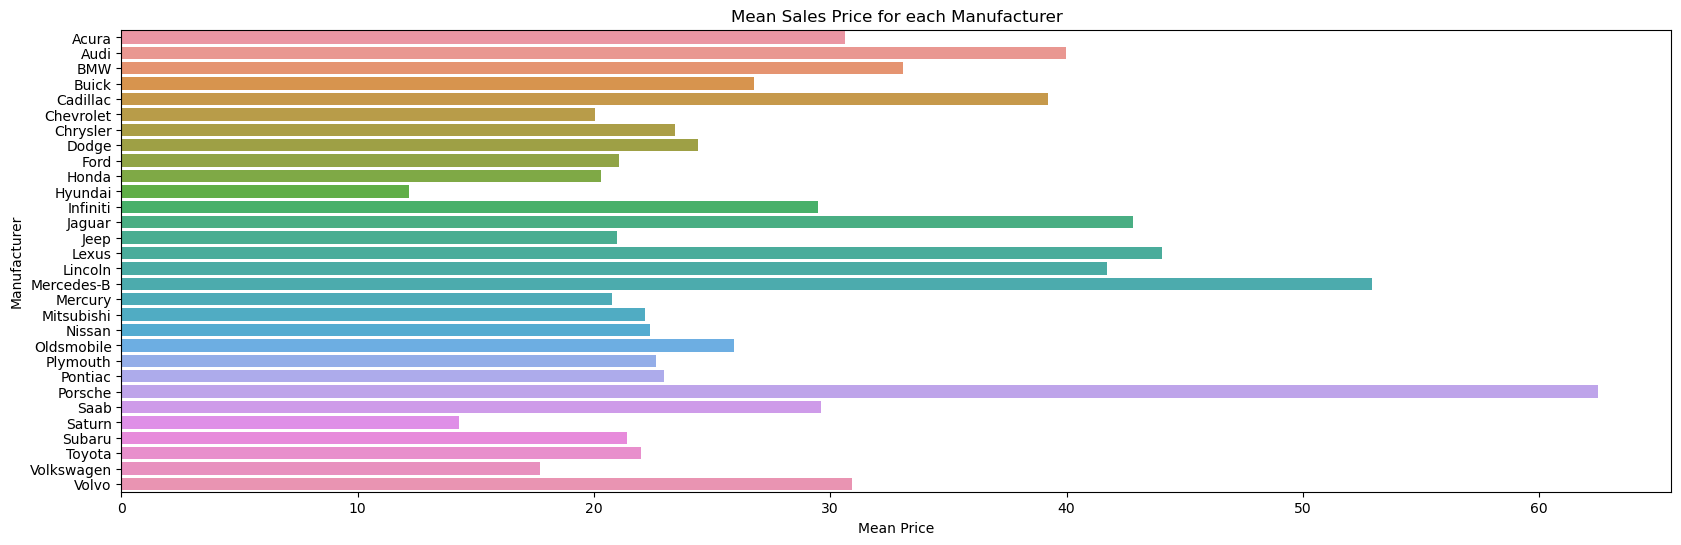

In [83]:
# Bar graph showing diffrent manufactures and their price in thousands
plt.figure(figsize = (20, 6))
sns.barplot(y=mean_price_manufacturer['Manufacturer'], x=mean_price_manufacturer['Price_in_thousands'])
plt.title('Mean Sales Price for each Manufacturer')
plt.ylabel('Manufacturer')
plt.xlabel('Mean Price')
plt.show()

Vehicle type

We can see there are only two unique features for the vehicle type which are "Passenger" and "Car". Passenger vehicles are 112 in total while car vehicles are 40 in total

In [84]:
type_count = sales['Vehicle_type'].value_counts(dropna = False)
type_count

Vehicle_type
Passenger    112
Car           40
Name: count, dtype: int64

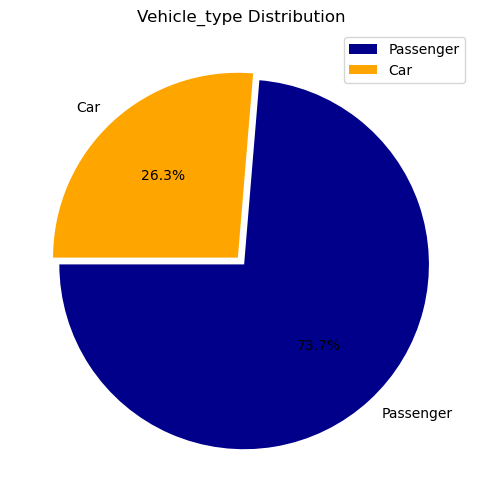

In [85]:
# Disribution of Vehicle_type 
plt.figure(figsize=(12,6))
plt.title("Vehicle_type Distribution")
Type = plt.pie(type_count, explode=(0.025,0.025),labels=type_count.index, colors=['darkblue','orange'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

Checking the mean_price of vehicle_types car and passenger

In [86]:
mean_price_type = sales[['Vehicle_type', 'Price_in_thousands']].groupby('Vehicle_type', as_index = False, observed = True).mean()
mean_price_type

,Vehicle_type,Price_in_thousands
0,Car,26.319975
1,Passenger,27.693196


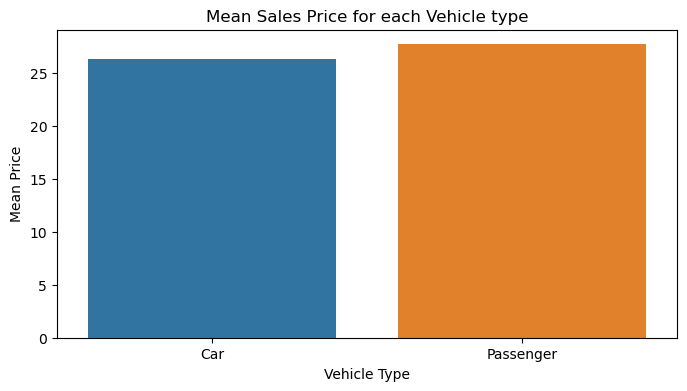

In [87]:
# Visualizing the mean price 
plt.figure(figsize = (8, 4))
sns.barplot(x=mean_price_type['Vehicle_type'], y=mean_price_type['Price_in_thousands'])
plt.title('Mean Sales Price for each Vehicle type')
plt.ylabel('Mean Price')
plt.xlabel('Vehicle Type')
plt.show()

* Relationship between price_in_thousands and other columns

In [88]:
# Loading the numerical columns 
sales_num = sales.select_dtypes(include = ['float64', 'int64']);
sales_num.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105


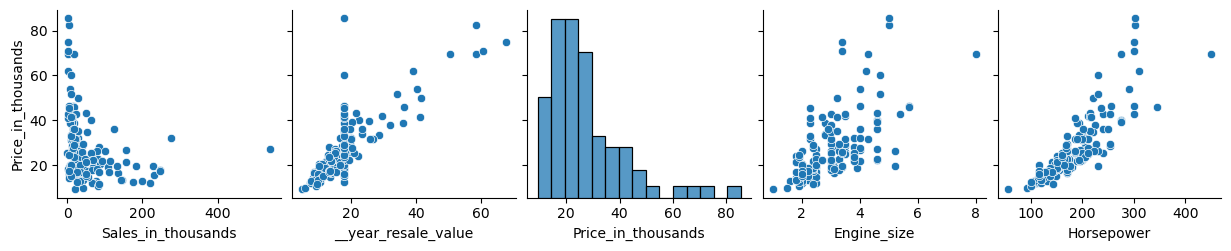

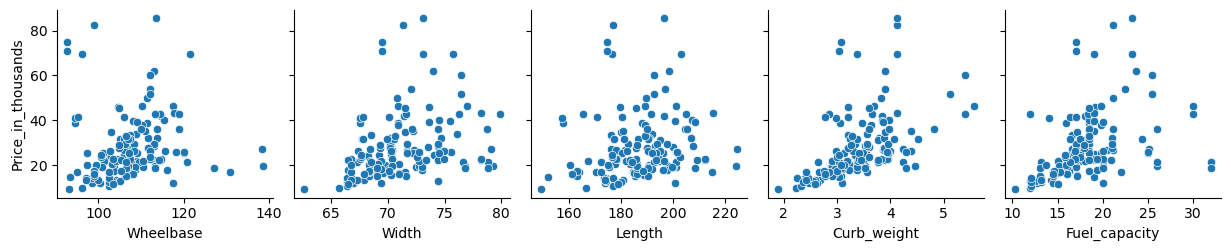

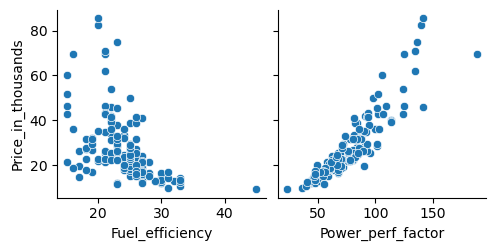

In [89]:
# Correlation using pairplot
for i in range(0, len(sales_num.columns),5):
    sns.pairplot(sales_num, y_vars ='Price_in_thousands', x_vars = sales_num.columns[i:i+5])

# Data Preprocessing

We can now get our dataset ready for model training

* Detecting and Handling outliers

Outliers are data points that have extreme values. They are unusually high or low values compared to the majority of data and can distort statistical analyses or models. Outliers can occur due to various reasons, such as measurement errors, data entry mistakes, or naturally rare events.

Outliers tend to skew our data. We can see that most of our columns have outliers.

Here we will remove this outliers using the IQR(Interquartile Range) Method.
We will calculate the IQR, which is the range between the 1st quartile (Q1) and 3rd quartile (Q3). Any data points beyond 1.5 times the IQR above Q3 or below Q1 is considered an outlier.


<Axes: >

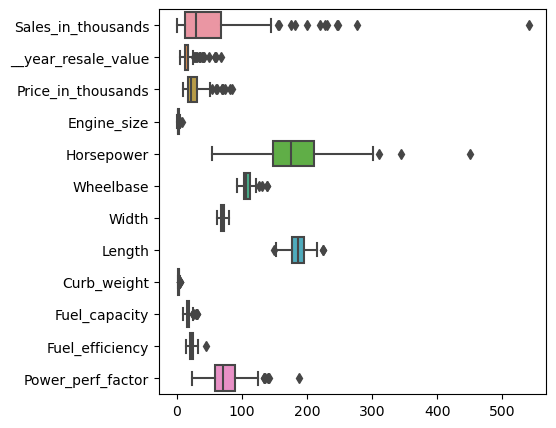

In [90]:
# Checking for outliers 
plt.figure(figsize=(5,5))
sns.boxplot(sales,orient="h")

In [91]:
def handle_outliers(data, columns):
    for column in columns:
        if column in data.columns:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1
            low_b = q1 - 1.5 * iqr
            high_b = q3 + 1.5 * iqr

            outliers = (data[column] < low_b) | (data[column] > high_b) 

            if outliers.any():
                print(f"{column}: has outliers")
                data[column] = np.where(data[column] < low_b, low_b,
                                    np.where(data[column] > high_b, high_b, data[column]))
            else:
                print(f"{column}: no outliers")

    return data

num_col = sales.select_dtypes(include='number').columns
sales = handle_outliers(sales, num_col)

Sales_in_thousands: has outliers
__year_resale_value: has outliers
Price_in_thousands: has outliers
Engine_size: has outliers
Horsepower: has outliers
Wheelbase: has outliers
Width: no outliers
Length: has outliers
Curb_weight: has outliers
Fuel_capacity: has outliers
Fuel_efficiency: has outliers
Power_perf_factor: has outliers


<Axes: >

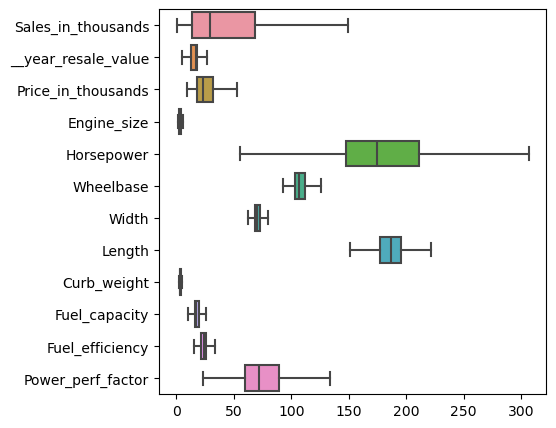

In [92]:
# Confirming removed outliers 
plt.figure(figsize=(5, 5))
sns.boxplot(sales,orient='h')

* Feature Engineering

Manufacturer

In [29]:
mean_price_manufacturer = sales[['Manufacturer', 'Price_in_thousands']].groupby('Manufacturer', as_index = False, observed = True).mean()
mean_price_manufacturer

,Manufacturer,Price_in_thousands
0,Acura,30.633333
1,Audi,36.984583
2,BMW,33.096667
3,Buick,26.781250
4,Cadillac,39.198750
5,Chevrolet,20.022778
6,Chrysler,23.430833
7,Dodge,22.713375
8,Ford,21.047273
9,Honda,20.277000


* Spliting the Manufacturer column in two such that if the mean price of a manufacturer is less than 30 then it belongs to the value 1 and if the mean price is more than 30 it belongs to class 2


In [30]:
#Creating two empty lists to hold names of manufacturers based on their mean prices.
first_class = []
second_class = []

for index in range (len(mean_price_manufacturer)):
    if mean_price_manufacturer.iloc[index,1] <= 30:
        first_class.append(mean_price_manufacturer.iloc[index, 0])

    else:
        second_class.append(mean_price_manufacturer.iloc[index, 0])

print("First_class: ",first_class)
print("Second_class: ",second_class)


First_class:  ['Buick', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jeep', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen']
Second_class:  ['Acura', 'Audi', 'BMW', 'Cadillac', 'Jaguar', 'Lexus', 'Lincoln', 'Mercedes-B', 'Porsche', 'Volvo']


In [31]:
# Adding the new data to the dataset
manufacturer = sales['Manufacturer']
modified_manufacturer = []

for value in manufacturer:
    if value in first_class:
        modified_manufacturer.append(0)
    else:
        modified_manufacturer.append(1)

sales['Manufacturer'] = modified_manufacturer

In [32]:
# confirming the change in the manufacturer column 
sales.head()

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,1,16.919,16.36000,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,1,39.384,19.87500,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,1,8.588,26.38375,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,1,20.397,22.25500,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,1,18.780,23.55500,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105


* Age

We will create an age column by using the formula 2024 - year value

In [33]:
# The launch is an empty list that will store the calculated age of each car model 
modified_age = []
launch=sales['Latest_Launch']

for value in launch:
    year = int(value.split('/')[-1])
    modified_age.append(2024 - year)

In [34]:
sales['Age'] = modified_age

In [35]:
sales.drop(columns=['Latest_Launch'],inplace=True)

In [36]:
# Confirming addition of age column 
sales.head()

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,1,16.919,16.36000,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,12
1,1,39.384,19.87500,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,13
3,1,8.588,26.38375,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,13
4,1,20.397,22.25500,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,13
5,1,18.780,23.55500,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,13


Text(0.5, 1.0, 'Age Distibution')

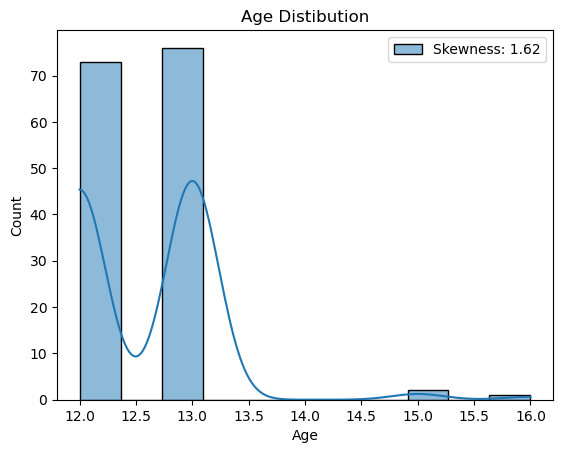

In [37]:
#Distribution of the new age column
sns.histplot(sales["Age"], label = 'Skewness: %.2f'%(sales['Age'].skew()),kde=True)
plt.legend(loc = 'best')
plt.title("Age Distibution")

* Checking for skewness in numerical values

Skewed data can negatively impact the performance of certain statistical analysis and ML models.

Since we will be using a linear regression model assume a normal distribution.If the data is highly skewed, these models may not perform optimally, leading to biased predictions, poor generalization, or inefficiencies in model training.

We reduce this skewed data using Box Cox transformation that is a more general transformation that adjusts based on a parameter to reduce skewness.

The Box-Cox transformation is a statistical technique used to stabilize variance and make the data more normally distributed, which can improve the performance of many machine learning algorithms. This transformation is particularly useful when the data is skewed, and it attempts to make the distribution closer to a bell-shaped (normal) curve.

1. Sales in Thousands

Text(0.5, 1.0, "Distribution of 'Sales_in_thousands'")

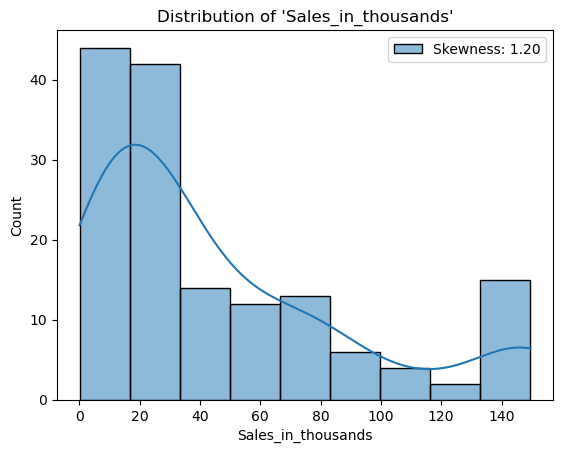

In [38]:
# Sales_in_thousands 
sns.histplot(sales['Sales_in_thousands'], label = 'Skewness: %.2f'%(sales['Sales_in_thousands'].skew()),kde=True)
plt.legend(loc = 'best')
plt.title("Distribution of 'Sales_in_thousands'")

* We can see that the data is slightly skewed

Text(0.5, 1.0, "Distribution of 'Sales_in_thousands'")

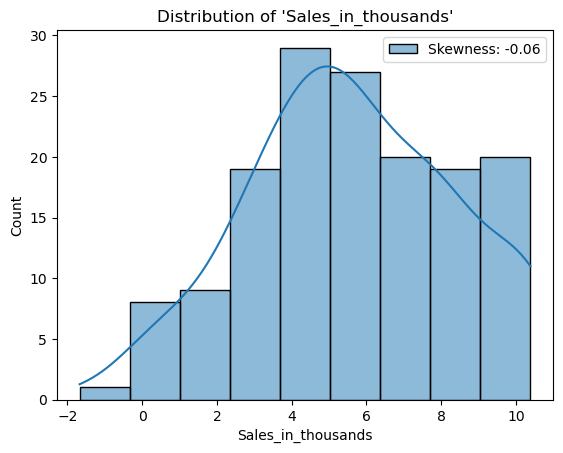

In [39]:
sales_data = [1 if value == 0 else value for value in sales['Sales_in_thousands']]

modified_sales, _ = stats.boxcox(sales_data)
sales['Sales_in_thousands'] = modified_sales

sns.histplot(sales['Sales_in_thousands'], label = 'Skewness: %.2f'%(sales['Sales_in_thousands'].skew()),kde= True)
plt.legend(loc = 'best')
plt.title("Distribution of 'Sales_in_thousands'")

* Some values in the Sales_in_Thousands column contain zero values, which might pose a problem for certain calculations.To avoid this we replace Zero values with 1 while other values remain unchanged.

* We then remove the skewness present in the column Sales_in_thousands by Boxcox transformation 

2. Year Resale Value

Text(0.5, 1.0, "Distribution of the column 'Year resale Value'")

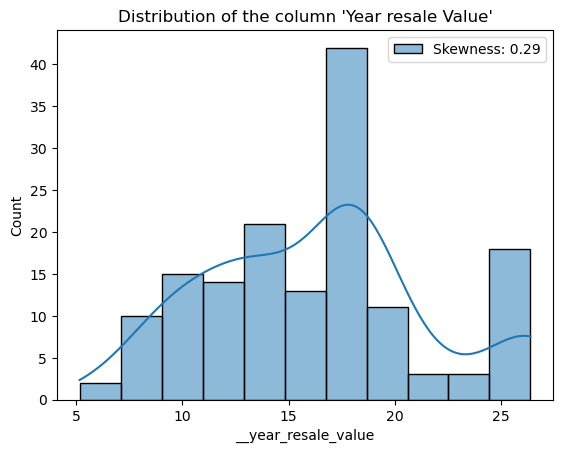

In [40]:
# __year_resale_value 
sns.histplot(sales["__year_resale_value"], label = 'Skewness: %.2f'%(sales["__year_resale_value"].skew()),kde=True)
plt.legend(loc = 'best')
plt.title("Distribution of the column 'Year resale Value'")

Text(0.5, 1.0, "Distribution of  'Year resale value'")

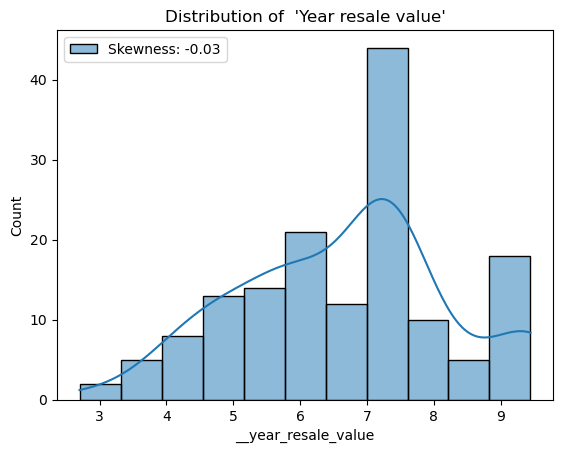

In [41]:
year_data = [1 if value == 0 else value for value in sales['__year_resale_value']]

modified_year, _ = stats.boxcox(year_data)
sales['__year_resale_value'] = modified_year

sns.histplot(sales['__year_resale_value'], label = 'Skewness: %.2f'%(sales['__year_resale_value'].skew()),kde=True)
plt.legend(loc = 'best')
plt.title("Distribution of  'Year resale value'")

3. Engine Size

Text(0.5, 1.0, "Distribution of 'Engine Size'")

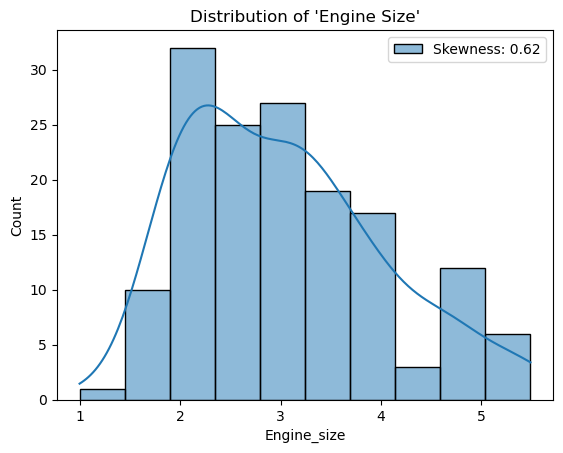

In [42]:
sns.histplot(sales["Engine_size"], label = 'Skewness: %.2f'%(sales["Engine_size"].skew()),kde=True)
plt.legend(loc = 'best')
plt.title("Distribution of 'Engine Size'")

Text(0.5, 1.0, "Distribution of 'Engine size'")

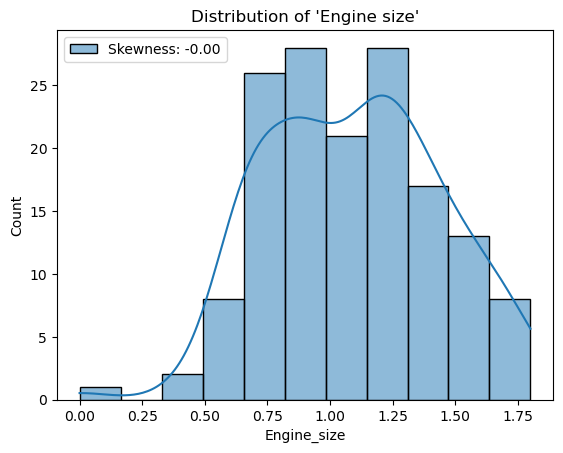

In [43]:
engine_data = [1 if value == 0 else value for value in sales['Engine_size']]

modified_engine, _ = stats.boxcox(engine_data)
sales['Engine_size'] = modified_engine

sns.histplot(sales['Engine_size'], label = 'Skewness: %.2f'%(sales['Engine_size'].skew()),kde=True)
plt.legend(loc = 'best')
plt.title("Distribution of 'Engine size'")

4. Fuel Capacity

Text(0.5, 1.0, "Distribution of the column 'Fuel capacity'")

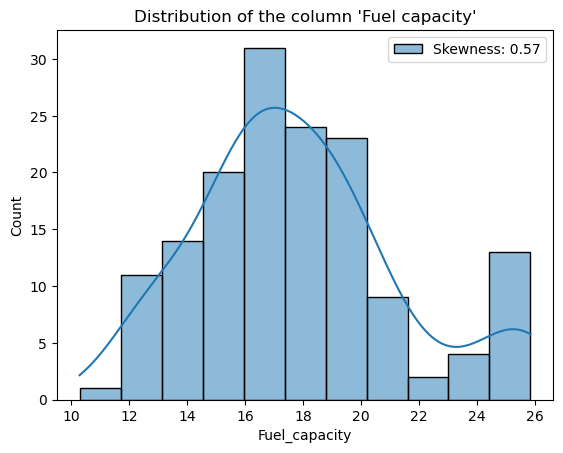

In [44]:
sns.histplot(sales["Fuel_capacity"], label = 'Skewness: %.2f'%(sales["Fuel_capacity"].skew()),kde=True)
plt.legend(loc = 'best')
plt.title("Distribution of the column 'Fuel capacity'")

Text(0.5, 1.0, "Distribution of 'Fuel capacity'")

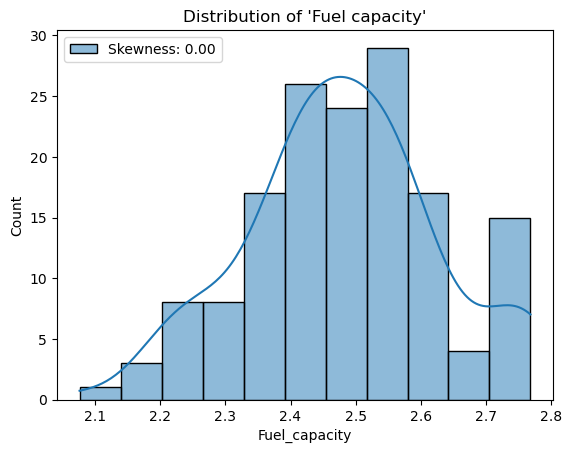

In [45]:
fuel_data = [1 if value == 0 else value for value in sales['Fuel_capacity']]

modified_fuel, _ = stats.boxcox(fuel_data)
sales['Fuel_capacity'] = modified_fuel

sns.histplot(sales['Fuel_capacity'], label = 'Skewness: %.2f'%(sales['Fuel_capacity'].skew()),kde= True)
plt.legend(loc = 'best')
plt.title("Distribution of 'Fuel capacity'")

5. Power performance factor

Text(0.5, 1.0, "Distribution of the column 'Power Performance Factor'")

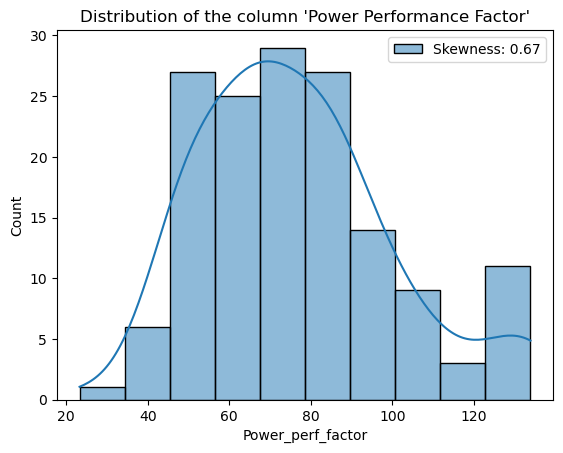

In [46]:
sns.histplot(sales["Power_perf_factor"], label = 'Skewness: %.2f'%(sales["Power_perf_factor"].skew()),kde=True)
plt.legend(loc = 'best')
plt.title("Distribution of the column 'Power Performance Factor'")

Text(0.5, 1.0, "Distribution of 'Power performance factor'")

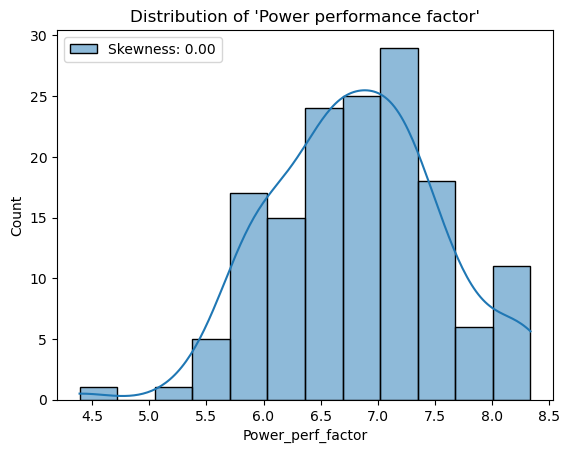

In [47]:
power_data = [1 if value == 0 else value for value in sales['Power_perf_factor']]

modified_power, _ = stats.boxcox(power_data)
sales['Power_perf_factor'] = modified_power

sns.histplot(sales['Power_perf_factor'], label = 'Skewness: %.2f'%(sales['Power_perf_factor'].skew()),kde=True)
plt.legend(loc = 'best')
plt.title("Distribution of 'Power performance factor'")

* Normalizing numerical columns

Different numerical features may have varying scales. Normalizing ensures that each feature contribute equally to the analysis by bringing all features to the same scale, typically between 0 and 1.

I will use the Min-Max Normalization method which scales the values of each feature to a range between 0 and 1. By normalizing these columns, the model will treat each feature fairly during training, improving the model's performance and convergence speed.

In [48]:
def normalize_columns(dataframe, column):
    data = dataframe[column]
    mini = min(data)
    maxi = max(data)
    
    new_data = []
    for value in data:
        new_data.append((value - mini)/(maxi - mini))
    
    dataframe[column] = new_data

numerical_columns = ['Sales_in_thousands', '__year_resale_value', 'Engine_size', 'Wheelbase', 'Width',
                    'Length', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor', 'Age']
for each_column in numerical_columns:
    normalize_columns(sales, each_column)

In [49]:
sales

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,1,0.486823,0.607347,Passenger,21.50,0.332870,140.0,0.256334,0.271676,0.303116,2.639,0.279021,0.702703,0.480758,0.00
1,1,0.651824,0.754610,Passenger,28.40,0.671207,225.0,0.461997,0.445087,0.593484,3.517,0.569068,0.540541,0.750684,0.25
3,1,0.378511,1.000000,Passenger,42.00,0.725046,210.0,0.655738,0.508671,0.645892,3.850,0.618103,0.378378,0.750815,0.25
4,1,0.520241,0.847913,Passenger,23.99,0.332870,150.0,0.298063,0.323699,0.382436,2.998,0.517452,0.648649,0.523717,0.25
5,1,0.505274,0.897036,Passenger,33.95,0.591558,200.0,0.479881,0.780347,0.580737,3.561,0.647547,0.378378,0.702465,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1,0.263315,0.680551,Passenger,24.40,0.364130,160.0,0.235469,0.289017,0.362606,3.042,0.476886,0.540541,0.557438,0.25
153,1,0.468900,0.680551,Passenger,27.50,0.500463,168.0,0.366617,0.387283,0.494334,3.208,0.612107,0.540541,0.593359,0.00
154,1,0.493049,0.680551,Passenger,28.80,0.500463,168.0,0.366617,0.387283,0.498584,3.259,0.612107,0.540541,0.597578,0.25
155,1,0.261610,0.680551,Passenger,45.50,0.475472,236.0,0.366617,0.514451,0.491501,3.601,0.647547,0.432432,0.818168,0.25


* Feature Encoding

Here we will turn categorical data in a dataset into numerical data since     machine learning algorithms require numerical input.

We will use one hot enoding for the column "Vehicle type"
The pd.get_dummies transforms categorical columns into one or more numerical columns.

One hot encoding will treat the vehicle types "passenger" and "car" as distinct  values which is important because theres no inherent order between them.

In [50]:
encoded_sales = pd.get_dummies(data = sales, columns = ['Vehicle_type'])
encoded_sales.head()

,Manufacturer,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Vehicle_type_Car,Vehicle_type_Passenger
0,1,0.486823,0.607347,21.50,0.332870,140.0,0.256334,0.271676,0.303116,2.639,0.279021,0.702703,0.480758,0.00,False,True
1,1,0.651824,0.754610,28.40,0.671207,225.0,0.461997,0.445087,0.593484,3.517,0.569068,0.540541,0.750684,0.25,False,True
3,1,0.378511,1.000000,42.00,0.725046,210.0,0.655738,0.508671,0.645892,3.850,0.618103,0.378378,0.750815,0.25,False,True
4,1,0.520241,0.847913,23.99,0.332870,150.0,0.298063,0.323699,0.382436,2.998,0.517452,0.648649,0.523717,0.25,False,True
5,1,0.505274,0.897036,33.95,0.591558,200.0,0.479881,0.780347,0.580737,3.561,0.647547,0.378378,0.702465,0.25,False,True


In [51]:
# Convert True/False to 1/0 only in the specific columns
encoded_sales['Vehicle_type_Passenger'] = encoded_sales['Vehicle_type_Passenger'].astype(int)
encoded_sales['Vehicle_type_Car'] = encoded_sales['Vehicle_type_Car'].astype(int)

# Display the resulting DataFrame
encoded_sales.head(10)


,Manufacturer,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Vehicle_type_Car,Vehicle_type_Passenger
0,1,0.486823,0.607347,21.50000,0.332870,140.000,0.256334,0.271676,0.303116,2.639,0.279021,0.702703,0.480758,0.00,0,1
1,1,0.651824,0.754610,28.40000,0.671207,225.000,0.461997,0.445087,0.593484,3.517,0.569068,0.540541,0.750684,0.25,0,1
3,1,0.378511,1.000000,42.00000,0.725046,210.000,0.655738,0.508671,0.645892,3.850,0.618103,0.378378,0.750815,0.25,0,1
4,1,0.520241,0.847913,23.99000,0.332870,150.000,0.298063,0.323699,0.382436,2.998,0.517452,0.648649,0.523717,0.25,0,1
5,1,0.505274,0.897036,33.95000,0.591558,200.000,0.479881,0.780347,0.580737,3.561,0.647547,0.378378,0.702465,0.25,0,1
6,1,0.166699,1.000000,53.01375,0.835554,306.875,0.608048,0.658960,0.668555,3.902,0.910038,0.324324,1.000000,0.00,0,1
7,1,0.514334,0.680551,26.99000,0.524498,170.000,0.438152,0.335260,0.354108,3.179,0.530612,0.594595,0.597874,0.25,0,1
8,1,0.389147,1.000000,33.40000,0.591558,193.000,0.438152,0.341040,0.354108,3.197,0.530612,0.486486,0.682563,0.00,0,1
9,1,0.493009,1.000000,38.90000,0.591558,193.000,0.560358,0.479769,0.524079,3.472,0.647547,0.540541,0.698314,0.25,0,1
10,0,0.857523,0.427354,21.97500,0.652207,175.000,0.488823,0.583815,0.617564,3.368,0.587745,0.540541,0.597792,0.25,0,1


In [52]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Manufacturer         152 non-null    int64   
 1   Sales_in_thousands   152 non-null    float64 
 2   __year_resale_value  152 non-null    float64 
 3   Vehicle_type         152 non-null    category
 4   Price_in_thousands   152 non-null    float64 
 5   Engine_size          152 non-null    float64 
 6   Horsepower           152 non-null    float64 
 7   Wheelbase            152 non-null    float64 
 8   Width                152 non-null    float64 
 9   Length               152 non-null    float64 
 10  Curb_weight          152 non-null    float64 
 11  Fuel_capacity        152 non-null    float64 
 12  Fuel_efficiency      152 non-null    float64 
 13  Power_perf_factor    152 non-null    float64 
 14  Age                  152 non-null    float64 
dtypes: category(1), float64(13),

# Modelling

We define our features and target variables(dependent variable). In this case the target variable will be the column ("Price_in_thousands") and the remaining columns will be our features.

In [53]:
X=encoded_sales.drop('Price_in_thousands',axis=1)
y=encoded_sales.Price_in_thousands

We then split the data into X_train, X_test, y_train, y_test for training and testing.Training data will be 80 while testing data will be 20. We then shuffle the data randomly to avoid having a biased split that leads to poor generalization of our model

In [54]:
#  Dividing the dataset into train and test in the ratio of 80 : 20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

We Create an ordered dictionary to store the root mean square error and the R-squared value

RMSE measures the average error between the predicted values from your model and the actual values from the dataset. It's a standard way to assess the accuracy of a regression model.RMSE gives you a sense of how far, on average, the predicted car prices are from the actual prices.

R-squared is a statistical measure that shows how well the independent variables (features) explain the variation in the dependent variable (car prices). It indicates the proportion of variance in the dependent variable that is predictable from the independent variables.


In [55]:
model_rmse = OrderedDict()

In [56]:
model_r2 = OrderedDict()

Applying Multi-linear Regression

In [57]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [58]:
# Predicting the Test set results 
y_pred = linear_regressor.predict(X_test)

Calculating RMSE and the R-Squared value of the model 

In [59]:
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)
r2_value = round(r2_score(y_test, y_pred), 3)

model_rmse['Multi Linear Regression'] = rmse
model_r2['Multi Linear Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))



Root Mean Squared Error of the model is : 3.744
R-squared value of the model is : 0.88


Applying DecisionTree Regressor

In [60]:
# Training the Decision Tree Regression model on the Training set

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [61]:
# Predicting the Test set results

y_pred = decision_tree_regressor.predict(X_test)

Calculating RMSE and the R-Squared value of the model 

In [62]:
mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(sqrt(mse), 3)
r2_value = round(r2_score(y_test, y_pred), 3)

model_rmse['Decision Tree Regression'] = rmse
model_r2['Decision Tree Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))


Root Mean Squared Error of the model is : 4.282
R-squared value of the model is : 0.843


RMSE of both Models

In [63]:
model_rmse

OrderedDict([('Multi Linear Regression', 3.744),
             ('Decision Tree Regression', 4.282)])

R-Squared value of both Models

In [64]:
model_r2

OrderedDict([('Multi Linear Regression', 0.88),
             ('Decision Tree Regression', 0.843)])

In [65]:
#Tabulating the results

table = []
table.append(['No.', 'Classification Model', 'Root Mean Squared Error', 'R-squared'])
count = 1

for model in model_rmse:
    row = [count, model, model_rmse[model], model_r2[model]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═══════╤══════════════════════════╤═══════════════════════════╤═════════════╕
│   No. │ Classification Model     │   Root Mean Squared Error │   R-squared │
╞═══════╪══════════════════════════╪═══════════════════════════╪═════════════╡
│     1 │ Multi Linear Regression  │                     3.744 │       0.88  │
├───────┼──────────────────────────┼───────────────────────────┼─────────────┤
│     2 │ Decision Tree Regression │                     4.282 │       0.843 │
╘═══════╧══════════════════════════╧═══════════════════════════╧═════════════╛


# Conclusion

The Multi LinearRegression Model was the best model for predicting the Sales Price of Cars